# Exercice 0 : échauffement

Q1. Donnez, dans la direction 3’→ 5’, la séquence codée par le brin d'ADN suivant :

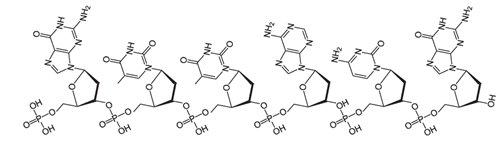

```markdown
GTATTG
```

Q2. Quelle est le peptide codé par la séquence d’ARNm suivante ?

3’– AUAACCAAUAUGCAAGUACAUGCA – 5’


```markdown
AUA ACC AAU AUG CAA GUA CAU GCA
Ile   Thr   Asn | Met |  Gln   Val   His   Ala
```

Q3.	Donnez toutes les séquences d'ARN (AUGC) possibles codant pour la séquence peptidique : TrpGluIleTyr.

```markdown
UGG GAA UAU
    GAG UAC
```

# Exercice 1 : Annotation de cadres de lectures ouverts

Voici en cadeau le code génétique

In [3]:
genecode = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
    'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
}


Q1. Téléchargez à partir de

https://www.ncbi.nlm.nih.gov/datasets/genome/

la séquence complète du génome de l’Adeno Associated Virus 2 (AAV2, identifiant NC_001401.2), **au format FASTA**.
La séquence doit faire 4679 bp.

Q2. Expliquez le format FASTA.

```markdown
Voici le fichier FASTA:

>NC_001401.2 Adeno-associated virus - 2, complete genome
TTGGCCACTCCCTCTCTGCGCGCTCGCTCGCTCACTGAGGCCGGGCGACCAAAGGTCGCCCGACGCCCGG
GCTTTGCCCGGGCGGCCTCAGTGAGCGAGCGAGCGCGCAGAGAGGGAGTGGCCAACTCCATCACTAGGGG
TTCCTGGAGGGGTGGAGTCGTGACGTGAATTACGTCATAGGGTTAGGGAGGTCCTGTATTAGAGGTCACG
TGAGTGTTTTGCGACATTTTGCGACACCATGTGGTCACGCTGGGTATTTAAGCCCGAGTGAGCACGCAGG
GTCTCCATTTTGAAGCGGGAGGTTTGAACGCGCAGCCGCCATGCCGGGGTTTTACGAGATTGTGATTAAG
GTCCCCAGCGACCTTGACGAGCATCTGCCCGGCATTTCTGACAGCTTTGTGAACTGGGTGGCCGAGAAGG
AATGGGAGTTGCCGCCAGATTCTGACATGGATCTGAATCTGATTGAGCAGGCACCCCTGACCGTGGCCGA
GAAGCTGCAGCGCGACTTTCTGACGGAATGGCGCCGTGTGAGTAAGGCCCCGGAGGCCCTTTTCTTTGTG
CAATTTGAGAAGGGAGAGAGCTACTTCCACATGCACGTGCTCGTGGAAACCACCGGGGTGAAATCCATGG
TTTTGGGACGTTTCCTGAGTCAGATTCGCGAAAAACTGATTCAGAGAATTTACCGCGGGATCGAGCCGAC
TTTGCCAAACTGGTTCGCGGTCACAAAGACCAGAAATGGCGCCGGAGGCGGGAACAAGGTGGTGGATGAG
TGCTACATCCCCAATTACTTGCTCCCCAAAACCCAGCCTGAGCTCCAGTGGGCGTGGACTAATATGGAAC
AGTATTTAAGCGCCTGTTTGAATCTCACGGAGCGTAAACGGTTGGTGGCGCAGCATCTGACGCACGTGTC
GCAGACGCAGGAGCAGAACAAAGAGAATCAGAATCCCAATTCTGATGCGCCGGTGATCAGATCAAAAACT
TCAGCCAGGTACATGGAGCTGGTCGGGTGGCTCGTGGACAAGGGGATTACCTCGGAGAAGCAGTGGATCC
AGGAGGACCAGGCCTCATACATCTCCTTCAATGCGGCCTCCAACTCGCGGTCCCAAATCAAGGCTGCCTT
GGACAATGCGGGAAAGATTATGAGCCTGACTAAAACCGCCCCCGACTACCTGGTGGGCCAGCAGCCCGTG
GAGGACATTTCCAGCAATCGGATTTATAAAATTTTGGAACTAAACGGGTACGATCCCCAATATGCGGCTT
CCGTCTTTCTGGGATGGGCCACGAAAAAGTTCGGCAAGAGGAACACCATCTGGCTGTTTGGGCCTGCAAC
TACCGGGAAGACCAACATCGCGGAGGCCATAGCCCACACTGTGCCCTTCTACGGGTGCGTAAACTGGACC
AATGAGAACTTTCCCTTCAACGACTGTGTCGACAAGATGGTGATCTGGTGGGAGGAGGGGAAGATGACCG
CCAAGGTCGTGGAGTCGGCCAAAGCCATTCTCGGAGGAAGCAAGGTGCGCGTGGACCAGAAATGCAAGTC
CTCGGCCCAGATAGACCCGACTCCCGTGATCGTCACCTCCAACACCAACATGTGCGCCGTGATTGACGGG
AACTCAACGACCTTCGAACACCAGCAGCCGTTGCAAGACCGGATGTTCAAATTTGAACTCACCCGCCGTC
TGGATCATGACTTTGGGAAGGTCACCAAGCAGGAAGTCAAAGACTTTTTCCGGTGGGCAAAGGATCACGT
GGTTGAGGTGGAGCATGAATTCTACGTCAAAAAGGGTGGAGCCAAGAAAAGACCCGCCCCCAGTGACGCA
GATATAAGTGAGCCCAAACGGGTGCGCGAGTCAGTTGCGCAGCCATCGACGTCAGACGCGGAAGCTTCGA
TCAACTACGCAGACAGGTACCAAAACAAATGTTCTCGTCACGTGGGCATGAATCTGATGCTGTTTCCCTG
CAGACAATGCGAGAGAATGAATCAGAATTCAAATATCTGCTTCACTCACGGACAGAAAGACTGTTTAGAG
TGCTTTCCCGTGTCAGAATCTCAACCCGTTTCTGTCGTCAAAAAGGCGTATCAGAAACTGTGCTACATTC
ATCATATCATGGGAAAGGTGCCAGACGCTTGCACTGCCTGCGATCTGGTCAATGTGGATTTGGATGACTG
CATCTTTGAACAATAAATGATTTAAATCAGGTATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGA
CACTCTCTCTGAAGGAATAAGACAGTGGTGGAAGCTCAAACCTGGCCCACCACCACCAAAGCCCGCAGAG
CGGCATAAGGACGACAGCAGGGGTCTTGTGCTTCCTGGGTACAAGTACCTCGGACCCTTCAACGGACTCG
ACAAGGGAGAGCCGGTCAACGAGGCAGACGCCGCGGCCCTCGAGCACGACAAAGCCTACGACCGGCAGCT
CGACAGCGGAGACAACCCGTACCTCAAGTACAACCACGCCGACGCGGAGTTTCAGGAGCGCCTTAAAGAA
GATACGTCTTTTGGGGGCAACCTCGGACGAGCAGTCTTCCAGGCGAAAAAGAGGGTTCTTGAACCTCTGG
GCCTGGTTGAGGAACCTGTTAAGACGGCTCCGGGAAAAAAGAGGCCGGTAGAGCACTCTCCTGTGGAGCC
AGACTCCTCCTCGGGAACCGGAAAGGCGGGCCAGCAGCCTGCAAGAAAAAGATTGAATTTTGGTCAGACT
GGAGACGCAGACTCAGTACCTGACCCCCAGCCTCTCGGACAGCCACCAGCAGCCCCCTCTGGTCTGGGAA
CTAATACGATGGCTACAGGCAGTGGCGCACCAATGGCAGACAATAACGAGGGCGCCGACGGAGTGGGTAA
TTCCTCGGGAAATTGGCATTGCGATTCCACATGGATGGGCGACAGAGTCATCACCACCAGCACCCGAACC
TGGGCCCTGCCCACCTACAACAACCACCTCTACAAACAAATTTCCAGCCAATCAGGAGCCTCGAACGACA
ATCACTACTTTGGCTACAGCACCCCTTGGGGGTATTTTGACTTCAACAGATTCCACTGCCACTTTTCACC
ACGTGACTGGCAAAGACTCATCAACAACAACTGGGGATTCCGACCCAAGAGACTCAACTTCAAGCTCTTT
AACATTCAAGTCAAAGAGGTCACGCAGAATGACGGTACGACGACGATTGCCAATAACCTTACCAGCACGG
TTCAGGTGTTTACTGACTCGGAGTACCAGCTCCCGTACGTCCTCGGCTCGGCGCATCAAGGATGCCTCCC
GCCGTTCCCAGCAGACGTCTTCATGGTGCCACAGTATGGATACCTCACCCTGAACAACGGGAGTCAGGCA
GTAGGACGCTCTTCATTTTACTGCCTGGAGTACTTTCCTTCTCAGATGCTGCGTACCGGAAACAACTTTA
CCTTCAGCTACACTTTTGAGGACGTTCCTTTCCACAGCAGCTACGCTCACAGCCAGAGTCTGGACCGTCT
CATGAATCCTCTCATCGACCAGTACCTGTATTACTTGAGCAGAACAAACACTCCAAGTGGAACCACCACG
CAGTCAAGGCTTCAGTTTTCTCAGGCCGGAGCGAGTGACATTCGGGACCAGTCTAGGAACTGGCTTCCTG
GACCCTGTTACCGCCAGCAGCGAGTATCAAAGACATCTGCGGATAACAACAACAGTGAATACTCGTGGAC
TGGAGCTACCAAGTACCACCTCAATGGCAGAGACTCTCTGGTGAATCCGGGCCCGGCCATGGCAAGCCAC
AAGGACGATGAAGAAAAGTTTTTTCCTCAGAGCGGGGTTCTCATCTTTGGGAAGCAAGGCTCAGAGAAAA
CAAATGTGGACATTGAAAAGGTCATGATTACAGACGAAGAGGAAATCAGGACAACCAATCCCGTGGCTAC
GGAGCAGTATGGTTCTGTATCTACCAACCTCCAGAGAGGCAACAGACAAGCAGCTACCGCAGATGTCAAC
ACACAAGGCGTTCTTCCAGGCATGGTCTGGCAGGACAGAGATGTGTACCTTCAGGGGCCCATCTGGGCAA
AGATTCCACACACGGACGGACATTTTCACCCCTCTCCCCTCATGGGTGGATTCGGACTTAAACACCCTCC
TCCACAGATTCTCATCAAGAACACCCCGGTACCTGCGAATCCTTCGACCACCTTCAGTGCGGCAAAGTTT
GCTTCCTTCATCACACAGTACTCCACGGGACAGGTCAGCGTGGAGATCGAGTGGGAGCTGCAGAAGGAAA
ACAGCAAACGCTGGAATCCCGAAATTCAGTACACTTCCAACTACAACAAGTCTGTTAATGTGGACTTTAC
TGTGGACACTAATGGCGTGTATTCAGAGCCTCGCCCCATTGGCACCAGATACCTGACTCGTAATCTGTAA
TTGCTTGTTAATCAATAAACCGTTTAATTCGTTTCAGTTGAACTTTGGTCTCTGCGTATTTCTTTCTTAT
CTAGTTTCCATGGCTACGTAGATAAGTAGCATGGCGGGTTAATCATTAACTACAAGGAACCCCTAGTGAT
GGAGTTGGCCACTCCCTCTCTGCGCGCTCGCTCGCTCACTGAGGCCGGGCGACCAAAGGTCGCCCGACGC
CCGGGCTTTGCCCGGGCGGCCTCAGTGAGCGAGCGAGCGCGCAGAGAGGGAGTGGCCAA

Il contient la suite des nucléotide de l'ADN, from 5' to 3'
```

## Cadres de lecture ouverts
L’annotation de séquences consiste à trouver les différents éléments présents dans une séquence (e.g. un génome), en particulier la position des différents gènes. Une manière grossière de trouver où sont les gènes est de trouver les cadres de lecture ouverts (Open Reading Frames ORFs) qui correspondent à toutes les sous-séquences entre un codon start et un codon STOP.

Q1.	Rappelez la définition d’un codon.

```markdown
3 nucléotides succéssif, il permet de s'associé à des protéines et d'ordonner leur synthétisation.
```

Q2.	Quels sont les codons START canoniques. Pour quel(s) acide(s) aminé(s) codent-ils ? En quoi sont-ils spéciaux ?

```markdown
AUG, Met. Il est spéciaux car il détermine le début de la traduction et donc la ou on commence à synthétisé des protéines
```

Q3.	Quels sont les codons STOP canoniques. Pour quel(s) acide(s) aminé(s) codent-ils ? En quoi sont-ils spéciaux ?

```markdown
UAA, UAG, UGA. Il ne définisse aucune protéines vu que ils stop la traduction des message.
```

Q4. Dans quelle direction un brin d’ADN est-il lu ?

```markdown
De 3' à 5'. Par l'ARNpol
```

Q5. Comment se structure la molécule d'ADN dans une cellule ?

```markdown
Deux brins d'ADN contenue dans le noyeau de la cellule? Une géométrie en forme d'hélice. Deuxième brin inverse du premier. Sucre stable extérieur et le reste à l'interieur
```

Q6. Quel(s) brin(s) de la molécule d'ADN peut (peuvent) porter un gène ?

```markdown
Les exons
```

Q7. Qu’est-ce que le cadre de lecture ? Combien en existe-t-il ?

```markdown
Quel ARM est utilisé, quesque on lit. Il y a l'ARMpol avec l'ADN, ARMm pour le transfère et l'enlèvement des introns. Et la l'ARMr (Ribosome) et les ARMt qui traduit le message qui est provenue de l'ARMm qui à traverser la protection du noyeau et est arrivé dans le cytoplasme.

transcription, maturation et traduction
```

Q8. Quand utilise-t-on un cadre de lecture pour interpréter une séquence d’ADN ?

```markdown
Pour créer un ARM, traduire un ARM, nettoyer un ARM
```

Q9.	Donnez l’ensemble des ORFs présents dans le génome de l’AAV2. Présentez vos résultats au format FASTA où pour chaque ORF vous fournissez les informations :
```MARKDOWN
> pos début, pos fin, brin
séquence
```
où "pos début" est la position du premier nucléotide du codon START et "pos fin" est la position du dernier nucléotide du codon STOP (les positions sont comptées depuis le début du brin), brin est l'orientation du brin + ou - (+ est la séquence de base; - est le brin complément inverse) et séquence est simplement la séquence.

In [4]:
code = """TTGGCCACTCCCTCTCTGCGCGCTCGCTCGCTCACTGAGGCCGGGCGACCAAAGGTCGCCCGACGCCCGG
GCTTTGCCCGGGCGGCCTCAGTGAGCGAGCGAGCGCGCAGAGAGGGAGTGGCCAACTCCATCACTAGGGG
TTCCTGGAGGGGTGGAGTCGTGACGTGAATTACGTCATAGGGTTAGGGAGGTCCTGTATTAGAGGTCACG
TGAGTGTTTTGCGACATTTTGCGACACCATGTGGTCACGCTGGGTATTTAAGCCCGAGTGAGCACGCAGG
GTCTCCATTTTGAAGCGGGAGGTTTGAACGCGCAGCCGCCATGCCGGGGTTTTACGAGATTGTGATTAAG
GTCCCCAGCGACCTTGACGAGCATCTGCCCGGCATTTCTGACAGCTTTGTGAACTGGGTGGCCGAGAAGG
AATGGGAGTTGCCGCCAGATTCTGACATGGATCTGAATCTGATTGAGCAGGCACCCCTGACCGTGGCCGA
GAAGCTGCAGCGCGACTTTCTGACGGAATGGCGCCGTGTGAGTAAGGCCCCGGAGGCCCTTTTCTTTGTG
CAATTTGAGAAGGGAGAGAGCTACTTCCACATGCACGTGCTCGTGGAAACCACCGGGGTGAAATCCATGG
TTTTGGGACGTTTCCTGAGTCAGATTCGCGAAAAACTGATTCAGAGAATTTACCGCGGGATCGAGCCGAC
TTTGCCAAACTGGTTCGCGGTCACAAAGACCAGAAATGGCGCCGGAGGCGGGAACAAGGTGGTGGATGAG
TGCTACATCCCCAATTACTTGCTCCCCAAAACCCAGCCTGAGCTCCAGTGGGCGTGGACTAATATGGAAC
AGTATTTAAGCGCCTGTTTGAATCTCACGGAGCGTAAACGGTTGGTGGCGCAGCATCTGACGCACGTGTC
GCAGACGCAGGAGCAGAACAAAGAGAATCAGAATCCCAATTCTGATGCGCCGGTGATCAGATCAAAAACT
TCAGCCAGGTACATGGAGCTGGTCGGGTGGCTCGTGGACAAGGGGATTACCTCGGAGAAGCAGTGGATCC
AGGAGGACCAGGCCTCATACATCTCCTTCAATGCGGCCTCCAACTCGCGGTCCCAAATCAAGGCTGCCTT
GGACAATGCGGGAAAGATTATGAGCCTGACTAAAACCGCCCCCGACTACCTGGTGGGCCAGCAGCCCGTG
GAGGACATTTCCAGCAATCGGATTTATAAAATTTTGGAACTAAACGGGTACGATCCCCAATATGCGGCTT
CCGTCTTTCTGGGATGGGCCACGAAAAAGTTCGGCAAGAGGAACACCATCTGGCTGTTTGGGCCTGCAAC
TACCGGGAAGACCAACATCGCGGAGGCCATAGCCCACACTGTGCCCTTCTACGGGTGCGTAAACTGGACC
AATGAGAACTTTCCCTTCAACGACTGTGTCGACAAGATGGTGATCTGGTGGGAGGAGGGGAAGATGACCG
CCAAGGTCGTGGAGTCGGCCAAAGCCATTCTCGGAGGAAGCAAGGTGCGCGTGGACCAGAAATGCAAGTC
CTCGGCCCAGATAGACCCGACTCCCGTGATCGTCACCTCCAACACCAACATGTGCGCCGTGATTGACGGG
AACTCAACGACCTTCGAACACCAGCAGCCGTTGCAAGACCGGATGTTCAAATTTGAACTCACCCGCCGTC
TGGATCATGACTTTGGGAAGGTCACCAAGCAGGAAGTCAAAGACTTTTTCCGGTGGGCAAAGGATCACGT
GGTTGAGGTGGAGCATGAATTCTACGTCAAAAAGGGTGGAGCCAAGAAAAGACCCGCCCCCAGTGACGCA
GATATAAGTGAGCCCAAACGGGTGCGCGAGTCAGTTGCGCAGCCATCGACGTCAGACGCGGAAGCTTCGA
TCAACTACGCAGACAGGTACCAAAACAAATGTTCTCGTCACGTGGGCATGAATCTGATGCTGTTTCCCTG
CAGACAATGCGAGAGAATGAATCAGAATTCAAATATCTGCTTCACTCACGGACAGAAAGACTGTTTAGAG
TGCTTTCCCGTGTCAGAATCTCAACCCGTTTCTGTCGTCAAAAAGGCGTATCAGAAACTGTGCTACATTC
ATCATATCATGGGAAAGGTGCCAGACGCTTGCACTGCCTGCGATCTGGTCAATGTGGATTTGGATGACTG
CATCTTTGAACAATAAATGATTTAAATCAGGTATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGA
CACTCTCTCTGAAGGAATAAGACAGTGGTGGAAGCTCAAACCTGGCCCACCACCACCAAAGCCCGCAGAG
CGGCATAAGGACGACAGCAGGGGTCTTGTGCTTCCTGGGTACAAGTACCTCGGACCCTTCAACGGACTCG
ACAAGGGAGAGCCGGTCAACGAGGCAGACGCCGCGGCCCTCGAGCACGACAAAGCCTACGACCGGCAGCT
CGACAGCGGAGACAACCCGTACCTCAAGTACAACCACGCCGACGCGGAGTTTCAGGAGCGCCTTAAAGAA
GATACGTCTTTTGGGGGCAACCTCGGACGAGCAGTCTTCCAGGCGAAAAAGAGGGTTCTTGAACCTCTGG
GCCTGGTTGAGGAACCTGTTAAGACGGCTCCGGGAAAAAAGAGGCCGGTAGAGCACTCTCCTGTGGAGCC
AGACTCCTCCTCGGGAACCGGAAAGGCGGGCCAGCAGCCTGCAAGAAAAAGATTGAATTTTGGTCAGACT
GGAGACGCAGACTCAGTACCTGACCCCCAGCCTCTCGGACAGCCACCAGCAGCCCCCTCTGGTCTGGGAA
CTAATACGATGGCTACAGGCAGTGGCGCACCAATGGCAGACAATAACGAGGGCGCCGACGGAGTGGGTAA
TTCCTCGGGAAATTGGCATTGCGATTCCACATGGATGGGCGACAGAGTCATCACCACCAGCACCCGAACC
TGGGCCCTGCCCACCTACAACAACCACCTCTACAAACAAATTTCCAGCCAATCAGGAGCCTCGAACGACA
ATCACTACTTTGGCTACAGCACCCCTTGGGGGTATTTTGACTTCAACAGATTCCACTGCCACTTTTCACC
ACGTGACTGGCAAAGACTCATCAACAACAACTGGGGATTCCGACCCAAGAGACTCAACTTCAAGCTCTTT
AACATTCAAGTCAAAGAGGTCACGCAGAATGACGGTACGACGACGATTGCCAATAACCTTACCAGCACGG
TTCAGGTGTTTACTGACTCGGAGTACCAGCTCCCGTACGTCCTCGGCTCGGCGCATCAAGGATGCCTCCC
GCCGTTCCCAGCAGACGTCTTCATGGTGCCACAGTATGGATACCTCACCCTGAACAACGGGAGTCAGGCA
GTAGGACGCTCTTCATTTTACTGCCTGGAGTACTTTCCTTCTCAGATGCTGCGTACCGGAAACAACTTTA
CCTTCAGCTACACTTTTGAGGACGTTCCTTTCCACAGCAGCTACGCTCACAGCCAGAGTCTGGACCGTCT
CATGAATCCTCTCATCGACCAGTACCTGTATTACTTGAGCAGAACAAACACTCCAAGTGGAACCACCACG
CAGTCAAGGCTTCAGTTTTCTCAGGCCGGAGCGAGTGACATTCGGGACCAGTCTAGGAACTGGCTTCCTG
GACCCTGTTACCGCCAGCAGCGAGTATCAAAGACATCTGCGGATAACAACAACAGTGAATACTCGTGGAC
TGGAGCTACCAAGTACCACCTCAATGGCAGAGACTCTCTGGTGAATCCGGGCCCGGCCATGGCAAGCCAC
AAGGACGATGAAGAAAAGTTTTTTCCTCAGAGCGGGGTTCTCATCTTTGGGAAGCAAGGCTCAGAGAAAA
CAAATGTGGACATTGAAAAGGTCATGATTACAGACGAAGAGGAAATCAGGACAACCAATCCCGTGGCTAC
GGAGCAGTATGGTTCTGTATCTACCAACCTCCAGAGAGGCAACAGACAAGCAGCTACCGCAGATGTCAAC
ACACAAGGCGTTCTTCCAGGCATGGTCTGGCAGGACAGAGATGTGTACCTTCAGGGGCCCATCTGGGCAA
AGATTCCACACACGGACGGACATTTTCACCCCTCTCCCCTCATGGGTGGATTCGGACTTAAACACCCTCC
TCCACAGATTCTCATCAAGAACACCCCGGTACCTGCGAATCCTTCGACCACCTTCAGTGCGGCAAAGTTT
GCTTCCTTCATCACACAGTACTCCACGGGACAGGTCAGCGTGGAGATCGAGTGGGAGCTGCAGAAGGAAA
ACAGCAAACGCTGGAATCCCGAAATTCAGTACACTTCCAACTACAACAAGTCTGTTAATGTGGACTTTAC
TGTGGACACTAATGGCGTGTATTCAGAGCCTCGCCCCATTGGCACCAGATACCTGACTCGTAATCTGTAA
TTGCTTGTTAATCAATAAACCGTTTAATTCGTTTCAGTTGAACTTTGGTCTCTGCGTATTTCTTTCTTAT
CTAGTTTCCATGGCTACGTAGATAAGTAGCATGGCGGGTTAATCATTAACTACAAGGAACCCCTAGTGAT
GGAGTTGGCCACTCCCTCTCTGCGCGCTCGCTCGCTCACTGAGGCCGGGCGACCAAAGGTCGCCCGACGC
CCGGGCTTTGCCCGGGCGGCCTCAGTGAGCGAGCGAGCGCGCAGAGAGGGAGTGGCCAA
"""
code = code.replace("\n", "")

cl_code = ""
for i in code:
    if i in ['A', 'C', 'T', 'G']:
        cl_code += i

UNTRADUCED_START = "AUG"
UNTRADUCED_STOP = ["UAA", "UAG", "UGA"]

START = "ATG"
STOP = ["TAA", "TAG", "TGA"]

ORFS = []
        
def find_ORFS(cleaned_code, symb):
    COUNT = 0
    idx = 0
    for idx in range(3):
        in_trad = False
        start_pos = 0
        while idx < len(cleaned_code):
            actual_code = cleaned_code[idx:idx + 3]
            if not in_trad:
                if actual_code == START:
                    in_trad = True
                    start_pos = idx
            elif actual_code in STOP:
                in_trad = False
                print("> "+ str(start_pos) + ", " + str(idx + 2)  + ", " + symb)
                print(cleaned_code[start_pos:idx + 3])
                ORFS.append([start_pos, idx + 2, symb, cleaned_code[start_pos:idx + 3]])
                COUNT += 1
            idx += 3
    return COUNT

c = find_ORFS(cl_code, "+")
c += find_ORFS(cl_code[::-1], "-")

> 735, 848, +
ATGGCGCCGGAGGCGGGAACAAGGTGGTGGATGAGTGCTACATCCCCAATTACTTGCTCCCCAAAACCCAGCCTGAGCTCCAGTGGGCGTGGACTAATATGGAACAGTATTTAA
> 954, 965, +
ATGCGCCGGTGA
> 1080, 1142, +
ATGCGGCCTCCAACTCGCGGTCCCAAATCAAGGCTGCCTTGGACAATGCGGGAAAGATTATGA
> 1251, 1361, +
ATGCGGCTTCCGTCTTTCTGGGATGGGCCACGAAAAAGTTCGGCAAGAGGAACACCATCTGGCTGTTTGGGCCTGCAACTACCGGGAAGACCAACATCGCGGAGGCCATAG
> 1401, 1442, +
ATGAGAACTTTCCCTTCAACGACTGTGTCGACAAGATGGTGA
> 1686, 1826, +
ATGACTTTGGGAAGGTCACCAAGCAGGAAGTCAAAGACTTTTTCCGGTGGGCAAAGGATCACGTGGTTGAGGTGGAGCATGAATTCTACGTCAAAAAGGGTGGAGCCAAGAAAAGACCCGCCCCCAGTGACGCAGATATAA
> 2151, 2189, +
ATGTGGATTTGGATGACTGCATCTTTGAACAATAAATGA
> 2202, 4409, +
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCTCTCTGAAGGAATAAGACAGTGGTGGAAGCTCAAACCTGGCCCACCACCACCAAAGCCCGCAGAGCGGCATAAGGACGACAGCAGGGGTCTTGTGCTTCCTGGGTACAAGTACCTCGGACCCTTCAACGGACTCGACAAGGGAGAGCCGGTCAACGAGGCAGACGCCGCGGCCCTCGAGCACGACAAAGCCTACGACCGGCAGCTCGACAGCGGAGACAACCCGTACCTCAAGTACAACCACGCCGACGCGGAGTTTCAGGAGCGCCTTAAAGAAGATACGTCTTTTGGGGGCAACCTCGGACG

Q10.	Combien d’ORFS trouvez-vous ?

In [5]:
print("Total ORFS: " + str(c)) # 19 sans changement de lecture


Total ORFS: 56


Q11. Affichez les ORFs le long du génome sous forme d'un graphe (en x les positions le long du génome, en y "l'id" de l'ORF) où chaque ORF est représentée per une ligne horizontale entre les positions de départ de de fin et une valeur y par ORF.

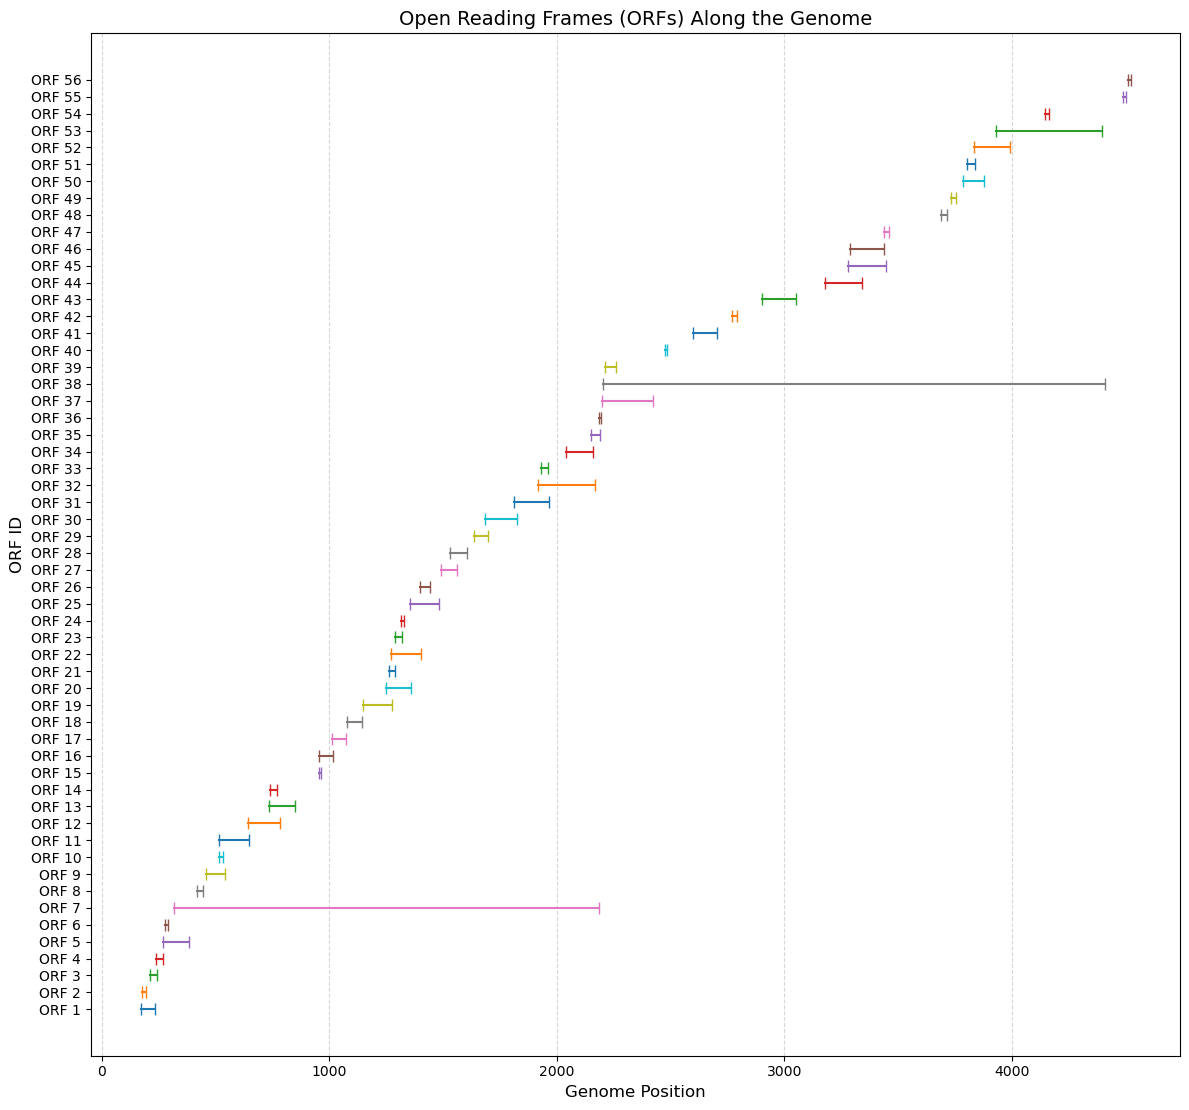

In [6]:
import matplotlib.pyplot as plt

# **Sorting ORFs** by (start_position, strand)
ORFS.sort(key=lambda orf: (orf[0], orf[2] == '-'))  # `+` comes first, then `-`

# Extract positions
x_start = [orf[0] for orf in ORFS]
x_end = [orf[1] for orf in ORFS]
y_values = range(len(ORFS))  # Assign a unique y-value per ORF

# Adjust figure size dynamically
plt.figure(figsize=(12, max(8, len(ORFS) * 0.2)))  # Adjust height based on number of ORFs

# Plot ORFs as horizontal lines
for y, x1, x2 in zip(y_values, x_start, x_end):
    plt.plot([x1, x2], [y, y], marker="|", markersize=8, label=f'ORF {y+1}')

# Labels and formatting
plt.xlabel("Genome Position", fontsize=12)
plt.ylabel("ORF ID", fontsize=12)
plt.title("Open Reading Frames (ORFs) Along the Genome", fontsize=14)
plt.yticks(y_values, [f'ORF {i+1}' for i in y_values], fontsize=10)
plt.xticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

Q12. En considérant que les différentes la probabilité d’apparition d’un nucléotide à chaque position le long d’un génome sont indépendantes, quelle est la probabilité d’apparition d’un codon START en fonction de la probabilité d’apparition des différents nucléotides $p_A,p_T,p_G,p_C$ ?

```markdown
START = Pa*Pt*Pg
```

Q13. Avec le même modèle, quelle est la probabilité d'apparition d'un codon STOP ?

```markdown
STOP = Pt*Pa*Pa + Pt*Pg*Pa + Pt*Pa*Pg
```

Q14. Affichez les probabilités d'apparition des codons START et STOP le long du génome de l’AAV2. Pour chaque position vous utilisez une fenêtre glissante de 501 nucléotide centrée sur cette position pour calculer la fréquence d’apparition des différents nucléotides (vous pouvez négliger les 501 premièrs et dernières nucléotides).

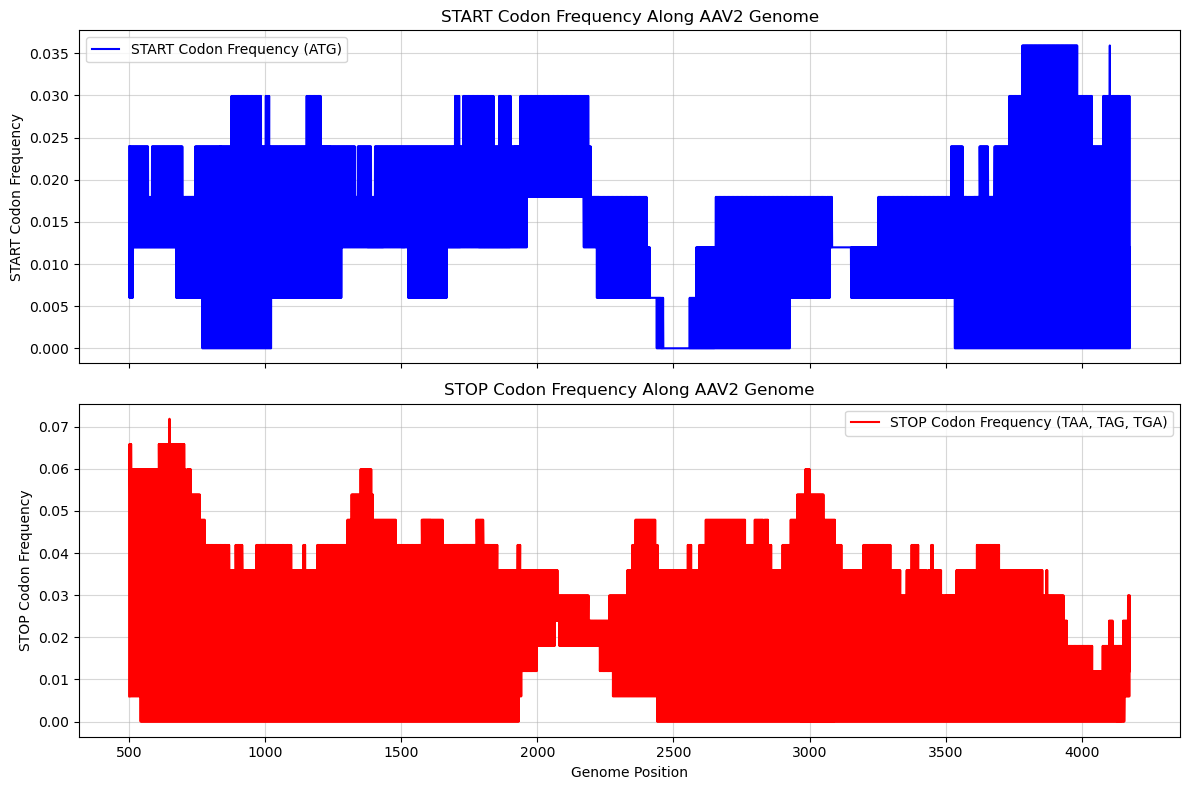

In [7]:
import matplotlib.pyplot as pltf

genome = cl_code

# Define codons
START_CODON = "ATG"
STOP_CODONS = {"TAA", "TAG", "TGA"}
WINDOW_SIZE = 501

# Store probabilities
positions = []
start_frequencies = []
stop_frequencies = []

# Sliding window approach (excluding first & last 501 bases)
for i in range(WINDOW_SIZE, len(genome) - WINDOW_SIZE):
    window = genome[i - WINDOW_SIZE // 2: i + WINDOW_SIZE // 2 + 1]

    # Count occurrences
    start_count = sum(1 for j in range(0, len(window) - 2, 3) if window[j:j+3] == START_CODON)
    stop_count = sum(1 for j in range(0, len(window) - 2, 3) if window[j:j+3] in STOP_CODONS)

    # Compute frequencies
    start_freq = start_count / (len(window) // 3)
    stop_freq = stop_count / (len(window) // 3)

    # Store results
    positions.append(i)
    start_frequencies.append(start_freq)
    stop_frequencies.append(stop_freq)

# Create subplots for better readability
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# START codon plot
axes[0].plot(positions, start_frequencies, label="START Codon Frequency (ATG)", color="blue")
axes[0].set_ylabel("START Codon Frequency")
axes[0].set_title("START Codon Frequency Along AAV2 Genome")
axes[0].grid(alpha=0.5)
axes[0].legend()

# STOP codon plot
axes[1].plot(positions, stop_frequencies, label="STOP Codon Frequency (TAA, TAG, TGA)", color="red")
axes[1].set_xlabel("Genome Position")
axes[1].set_ylabel("STOP Codon Frequency")
axes[1].set_title("STOP Codon Frequency Along AAV2 Genome")
axes[1].grid(alpha=0.5)
axes[1].legend()

# Show the plot
plt.tight_layout()
plt.show()

Q15.	Téléchargez l’annotation du génome à partir de Genbank :

https://www.ncbi.nlm.nih.gov/datasets/gene/GCF_000838645.1/

Comparez les ORFS que vous avez trouvé avec le génome annoté (on s’intéresse à l’annotation « gene »).

In [8]:
#Votre code ici

Q16. Qu’observez-vous ?

```markdown
Je n'ai pas été capable de trouvé les anotations, il n'y avait pas de data au lien donné
```

# Exercice 2 : biais d’utilisation des codons

Le code génétique étant redondant, plusieurs codons codent pour un même acide aminé. A l’inverse, cela veut dire que pour stocker un même acide aminé dans le génome, un organisme a différentes possibilités. Dans cet exercice, on va étudier si différents organismes ont des préférences différentes pour coder différents acides aminés ?

Q1. Récupperez les génomes des organismes suivants à partir de Genbank:
1.	AAV2 - NC_001401.2
2.	Plasmodium Falciparum 3D7 Chromosome 9 – AL844508
3.	Escherichia coli souche BL21 - NZ_CP053601
4.	Homo Sapiens Chromosome 10 build GRCh38.p14 - NC_000010.11

In [9]:
AAV2 = cl_code
with open("Plasm.txt", "r") as f:
    PlasmU = "".join(line.strip() for line in f.readlines() if not line.startswith(">"))
Plasm = ""
print(len(PlasmU))
for i in PlasmU:
    if i in ['A', 'C', 'T', 'G']:
        Plasm += i
print(len(Plasm))
with open("HomoC.txt", "r") as f:
    HomoCU = "".join(line.strip() for line in f.readlines() if not line.startswith(">"))
HomoC = ""
print(len(HomoCU))
for i in HomoCU:
    if i in ['A', 'C', 'T', 'G']:
        HomoC += i
print(len(HomoC))

1541735
1541735
111184850


KeyboardInterrupt: 

In [10]:
HomoC = HomoCU

Q2. Calculez la fréquence d’apparition de chaque codon présents dans chacun de ces génomes.

In [11]:
from collections import Counter

def count_codons(sequence):
    codon_counts = Counter(sequence[i:i+3] for i in range(0, len(sequence) - 2, 3))
    total_codons = sum(codon_counts.values())
    codon_freq = {codon: count / total_codons for codon, count in codon_counts.items()}
    return codon_freq

In [12]:
AAV2_codons = count_codons(cl_code)

Plasmodium_codons = count_codons(Plasm)

HomoSapiens_codons = count_codons(HomoC)


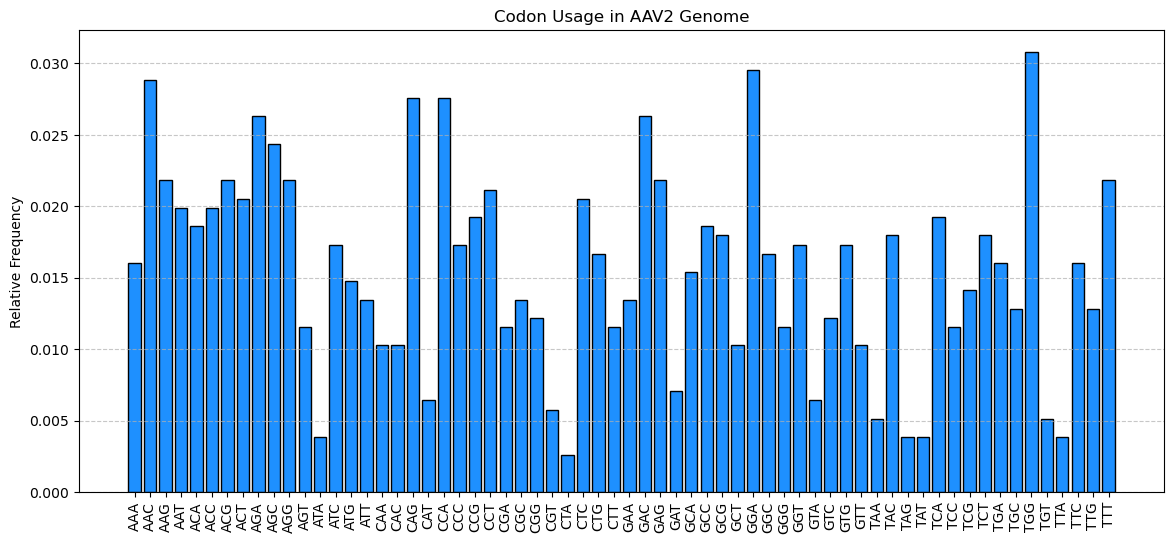

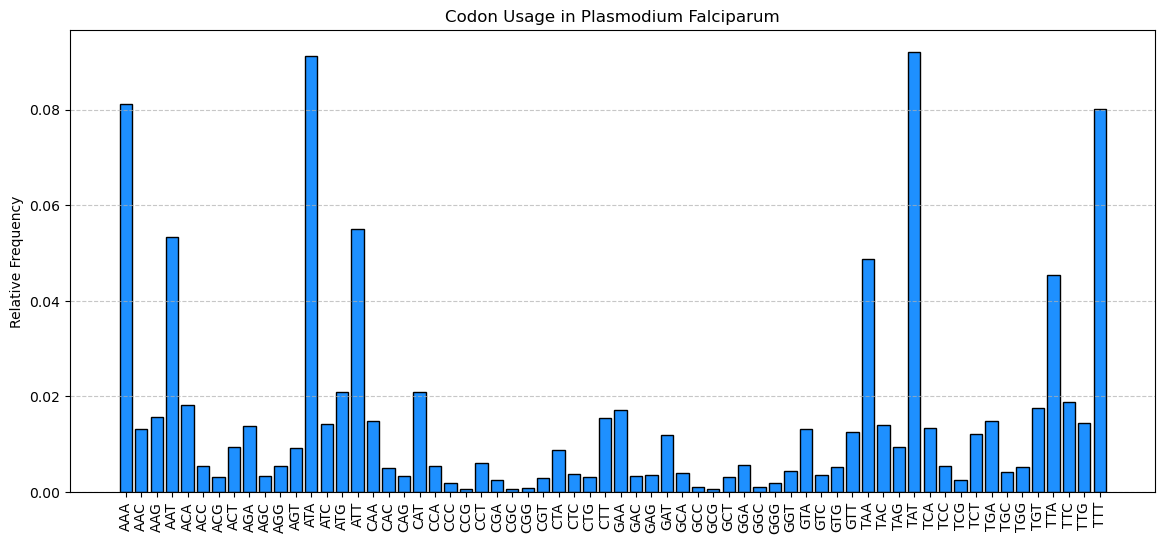

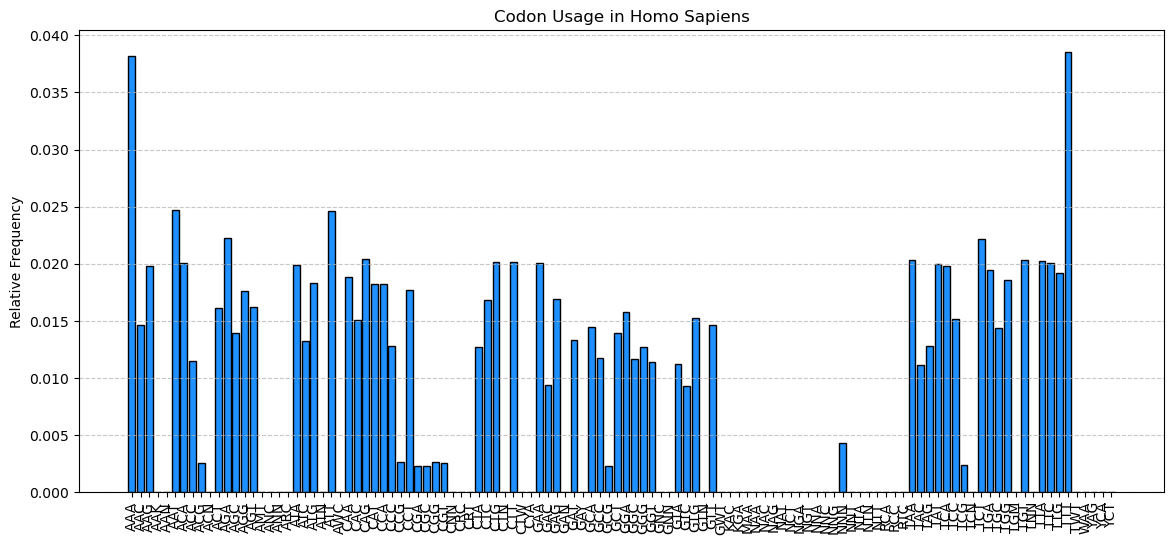

In [13]:
def plot_codon_usage(codon_dict, title):
    """
    Plots the codon frequency distribution.
    """
    codons, frequencies = zip(*sorted(codon_dict.items()))  # Sort codons alphabetically
    plt.figure(figsize=(14, 6))
    plt.bar(codons, frequencies, color="dodgerblue", edgecolor="black")
    plt.xticks(rotation=90)
    plt.ylabel("Relative Frequency")
    plt.title(title)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Plot codon usage for each genome
plot_codon_usage(AAV2_codons, "Codon Usage in AAV2 Genome")
plot_codon_usage(Plasmodium_codons, "Codon Usage in Plasmodium Falciparum")
plot_codon_usage(HomoSapiens_codons, "Codon Usage in Homo Sapiens")

Q3. Affichez les résultats sous forme de heatmap avec en axe x les acides aminés et en axe y les codons. Chaque case représente en niveau de couleur la fréquence d'apparition d'un codon pour un acide aminé.

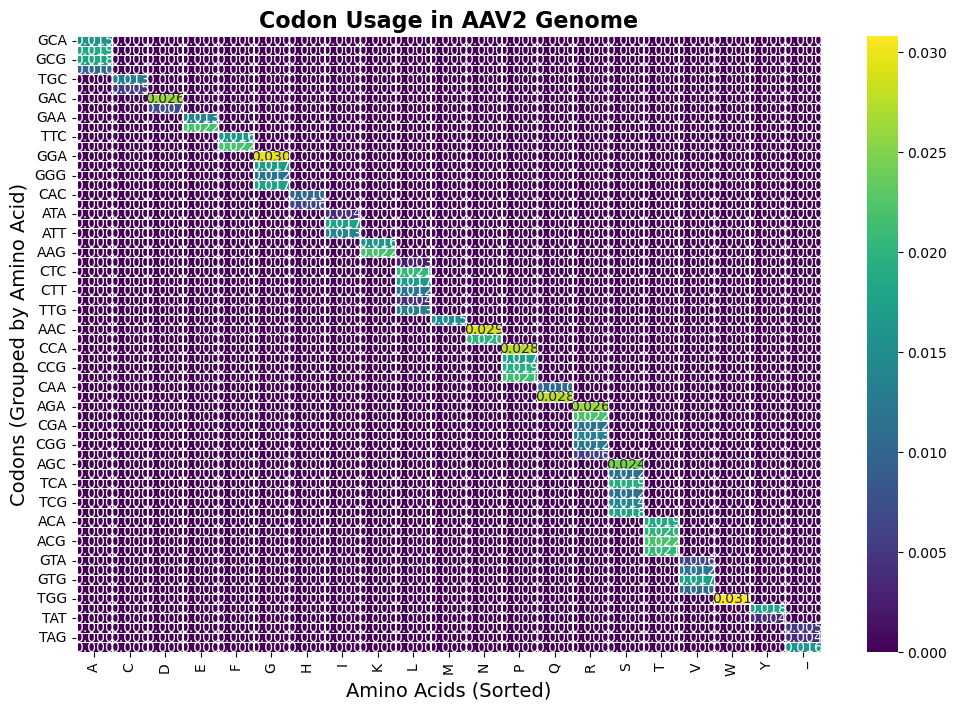

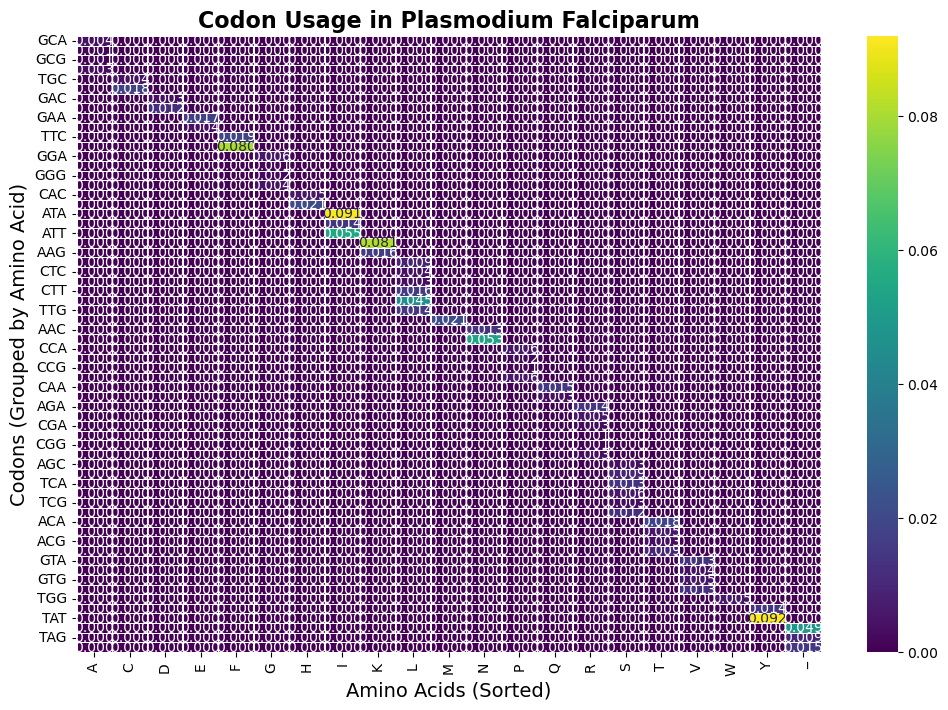

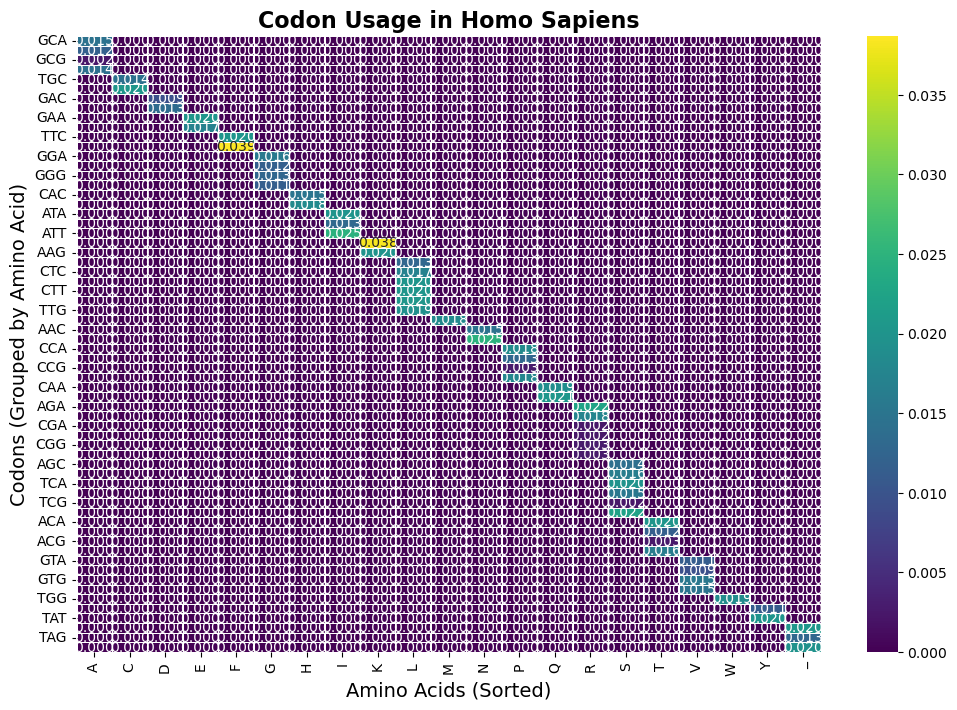

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

def codon_usage_heatmap(sequence, title):
    """
    Computes codon frequency and visualizes it as a heatmap using the provided genecode.
    """
    # Count codons
    codon_counts = Counter(sequence[i:i+3] for i in range(0, len(sequence) - 2, 3) if sequence[i:i+3] in genecode)

    # Normalize frequencies
    total_codons = sum(codon_counts.values())
    codon_freq = {codon: count / total_codons for codon, count in codon_counts.items()} if total_codons else {}

    # Group by amino acid
    aa_codon_freq = {}
    for codon, freq in codon_freq.items():
        aa = genecode[codon]  # Use the provided dictionary
        if aa not in aa_codon_freq:
            aa_codon_freq[aa] = {}
        aa_codon_freq[aa][codon] = freq

    # Sort amino acids alphabetically
    sorted_aa = sorted(aa_codon_freq.keys())

    # Reorder codons to match the sorted amino acids
    sorted_codons = []
    for aa in sorted_aa:
        # Get codons corresponding to the current amino acid
        codons_for_aa = [codon for codon, mapped_aa in genecode.items() if mapped_aa == aa]
        # Keep only codons that exist in the dataset
        codons_for_aa = [codon for codon in codons_for_aa if codon in codon_freq]
        sorted_codons.extend(codons_for_aa)

    # Convert to DataFrame and reorder both rows and columns
    df = pd.DataFrame(aa_codon_freq).fillna(0)
    df = df[sorted_aa]  # Order columns (amino acids)
    df = df.loc[sorted_codons]  # Order rows (codons)

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(df, cmap="viridis", annot=True, fmt=".3f", linewidths=0.5)
    plt.xlabel("Amino Acids (Sorted)", fontsize=14)
    plt.ylabel("Codons (Grouped by Amino Acid)", fontsize=14)
    plt.title(title, fontsize=16, fontweight="bold")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

# Generate heatmaps for each genome
codon_usage_heatmap(cl_code, "Codon Usage in AAV2 Genome")
codon_usage_heatmap(Plasm, "Codon Usage in Plasmodium Falciparum")
codon_usage_heatmap(HomoC, "Codon Usage in Homo Sapiens")


Q4. Ces heatmaps sont-elles similaires ?

```markdown
Pas vraiment, les focalisations ne se font pas au mêmes endroits.
```

# Exercice 3 : optimisation de codons

L’exercice précédent nous a montré qu’il existait bien un biais dans l’utilisation des codons synonymes entre différents organismes. En pratique, si une séquence d’ADN d’un organisme ne suit pas son biais d'utilisation de codons, cela peut avoir un impact sur sa vitesse de traduction et donc la quantité de protéines associées.

Si on souhaite introduire dans un organisme un gène provenant d’un autre organisme il est donc préférable d’optimiser la séquence selon les biais de codons de l’organisme cible.

Q1. Créer un code qui prend en entrée une séquence d’ADN codante et une table de fréquence d’utilisation des codons pour un organisme et retourne la séquence produisant la même protéine mais utilisant uniquement les codons les plus fréquemment utilisés selon la table donnée.

In [15]:
import pandas as pd
from collections import Counter

def get_most_frequent_codons(sequence, genecode):
    """
    Computes the most frequently used codon for each amino acid in a given DNA sequence.
    """
    # Count codon occurrences
    codon_counts = Counter(sequence[i:i+3] for i in range(0, len(sequence) - 2, 3) if sequence[i:i+3] in genecode)

    # Normalize frequencies
    total_codons = sum(codon_counts.values())
    codon_freq = {codon: count / total_codons for codon, count in codon_counts.items()} if total_codons else {}

    # Group frequencies by amino acid
    aa_codon_freq = {}
    for codon, freq in codon_freq.items():
        aa = genecode[codon]
        if aa not in aa_codon_freq:
            aa_codon_freq[aa] = {}
        aa_codon_freq[aa][codon] = freq

    # Determine the most frequent codon for each amino acid
    most_frequent_codons = {}
    for aa, codons in aa_codon_freq.items():
        most_frequent_codons[aa] = max(codons, key=codons.get)

    return most_frequent_codons

def optimize_sequence(dna_sequence, codon_usage_table, genecode):
    """
    Optimizes a DNA sequence using the most frequently used codons from the target organism.
    """
    optimized_seq = ""
    for i in range(0, len(dna_sequence) - 2, 3):
        codon = dna_sequence[i:i+3]
        if codon in genecode:  # Ensure it's a valid codon
            amino_acid = genecode[codon]
            optimized_seq += codon_usage_table.get(amino_acid, codon)  # Replace if available

    return optimized_seq

# Step 1: Compute most frequent codons from a target genome (e.g., Homo sapiens)
target_codon_usage = get_most_frequent_codons(HomoC, genecode)

# Step 2: Optimize a given DNA sequence to match Homo sapiens codon bias
original_sequence = "ATGTTCGACGCGTAA"  # Example coding sequence
optimized_sequence = optimize_sequence(original_sequence, target_codon_usage, genecode)

print("Original Sequence:  ", original_sequence)
print("Optimized Sequence: ", optimized_sequence)


Original Sequence:   ATGTTCGACGCGTAA
Optimized Sequence:  ATGTTTGATGCATAA


Q2. On va combiner les deux derniers exercices: écrivez un code qui prend en entrée un id de génome et une séquence à optimiser. Votre code télécharge le génome, calcule la table de biais de codons et optimise la séquence d'entrée pour cette table.

In [16]:
from collections import Counter
from Bio import Entrez, SeqIO
import pandas as pd

# Genetic code dictionary
genecode = {
    'ATA': 'I', 'ATC': 'I', 'ATT': 'I', 'ATG': 'M',
    'ACA': 'T', 'ACC': 'T', 'ACG': 'T', 'ACT': 'T',
    'AAC': 'N', 'AAT': 'N', 'AAA': 'K', 'AAG': 'K',
    'AGC': 'S', 'AGT': 'S', 'AGA': 'R', 'AGG': 'R',
    'CTA': 'L', 'CTC': 'L', 'CTG': 'L', 'CTT': 'L',
    'CCA': 'P', 'CCC': 'P', 'CCG': 'P', 'CCT': 'P',
    'CAC': 'H', 'CAT': 'H', 'CAA': 'Q', 'CAG': 'Q',
    'CGA': 'R', 'CGC': 'R', 'CGG': 'R', 'CGT': 'R',
    'GTA': 'V', 'GTC': 'V', 'GTG': 'V', 'GTT': 'V',
    'GCA': 'A', 'GCC': 'A', 'GCG': 'A', 'GCT': 'A',
    'GAC': 'D', 'GAT': 'D', 'GAA': 'E', 'GAG': 'E',
    'GGA': 'G', 'GGC': 'G', 'GGG': 'G', 'GGT': 'G',
    'TCA': 'S', 'TCC': 'S', 'TCG': 'S', 'TCT': 'S',
    'TTC': 'F', 'TTT': 'F', 'TTA': 'L', 'TTG': 'L',
    'TAC': 'Y', 'TAT': 'Y', 'TAA': '_', 'TAG': '_',
    'TGC': 'C', 'TGT': 'C', 'TGA': '_', 'TGG': 'W'
}

def download_genome(genome_id):
    """
    Downloads a genome from GenBank using its accession ID.
    """
    Entrez.email = "your_email@example.com"  # Required by NCBI
    handle = Entrez.efetch(db="nucleotide", id=genome_id, rettype="fasta", retmode="text")
    record = SeqIO.read(handle, "fasta")
    handle.close()
    return str(record.seq)

def extract_clean_sequence(genome_sequence):
    """
    Removes unwanted characters and returns only A, T, C, G.
    """
    return "".join(base for base in genome_sequence if base in "ATCG")

def get_most_frequent_codons(sequence):
    """
    Computes the most frequently used codon for each amino acid in the genome.
    """
    codon_counts = Counter(sequence[i:i+3] for i in range(0, len(sequence) - 2, 3) if sequence[i:i+3] in genecode)

    total_codons = sum(codon_counts.values())
    codon_freq = {codon: count / total_codons for codon, count in codon_counts.items()} if total_codons else {}

    aa_codon_freq = {}
    for codon, freq in codon_freq.items():
        aa = genecode[codon]
        if aa not in aa_codon_freq:
            aa_codon_freq[aa] = {}
        aa_codon_freq[aa][codon] = freq

    return {aa: max(codons, key=codons.get) for aa, codons in aa_codon_freq.items()}

def optimize_sequence(dna_sequence, codon_usage_table):
    """
    Optimizes a DNA sequence using the most frequent codons from the target organism.
    """
    optimized_seq = ""
    for i in range(0, len(dna_sequence) - 2, 3):
        codon = dna_sequence[i:i+3]
        if codon in genecode:  # Ensure it's a valid codon
            amino_acid = genecode[codon]
            optimized_seq += codon_usage_table.get(amino_acid, codon)  # Replace if available
    return optimized_seq

def main(genome_id, input_sequence):
    """
    Full pipeline: Download genome, compute codon usage, optimize sequence.
    """
    print(f"Downloading genome {genome_id}...")
    #genome_seq = download_genome(genome_id)
    #clean_genome = extract_clean_sequence(genome_seq)

    clean_genome = cl_code
    
    print("Computing codon usage table...")
    codon_usage_table = get_most_frequent_codons(clean_genome)

    print("Optimizing sequence...")
    optimized_sequence = optimize_sequence(input_sequence, codon_usage_table)

    print("\nOriginal Sequence:  ", input_sequence)
    print("Optimized Sequence: ", optimized_sequence)

# Example Usage
genome_id = "NC_001401.2"  # AAV2 Genome
input_sequence = "ATGTTCGACGCGTAA"  # Example coding sequence

main(genome_id, input_sequence)


Computing codon usage table...
Optimizing sequence...

Original Sequence:   ATGTTCGACGCGTAA
Optimized Sequence:  ATGTTTGACGCCTGA
